In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit


from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score



In [123]:

# Path to your CSV file
file_path = r"C:\Users\migue\Downloads\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\iris_dataset.csv"

# Read the CSV file into a Pandas DataFrame
irisdf = pd.read_csv(file_path)

#Example preprocessing; different from kaggle! Check and compare for the best preprocesing; No need to scale y since its a categorical value and not a continious one aparently

X = irisdf.drop(columns='target')  # Features
y = irisdf['target']              # Target

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) #This 2 steps make the non-numerical values of y numerical

# Ensure there are no missing values


# Preprocessing pipeline
features_num = X.columns  # All features are numerical

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),  # StandarScaler makes the data have mean 0 and variance 1 
    )

#X_to_split = X.preprocessor() 
# Split the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_encoded, test_size=0.75, random_state=42, stratify=y_encoded
)


# Apply preprocessing to the training and validation sets
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)


input_shape = [X_train.shape[1]]

print("Missing values in dataset:\n", irisdf.isnull().sum())
print("Input shape: {}".format(input_shape))

# Print the transformed data shapes and normalized feature example
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("First row of X_train after preprocessing:", X_train[0])

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(irisdf.head())

# Display basic statistics of the DataFrame
print("\nBasic statistics:")
print(irisdf.describe())

# Check for missing values
print("\nMissing values in each column:")
print(irisdf.isnull().sum())

# Display DataFrame info to ensure it is ML-ready
print("\nDataFrame info:")
print(irisdf.info())


Missing values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Input shape: [4]
X_train shape: (37, 4)
X_valid shape: (113, 4)
First row of X_train after preprocessing: [ 0.41159644 -1.74437157  0.41058885  0.48402956]
Head of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

        target  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
coun

##Shitty code snippet:

In [124]:
class QuantumClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_qubits=4, layers=2, stepsize=0.2, epochs=50):
        self.n_qubits = n_qubits
        self.layers = layers
        self.stepsize = stepsize
        self.epochs = epochs
        self.params = None
        self.opt = qml.AdamOptimizer(stepsize=self.stepsize) #chack optimizers! There re many different ones
        self.dev = qml.device("default.qubit", wires=self.n_qubits)

        @qml.qnode(self.dev)
        def circuit(x, params):
            self._feature_map(x)
            self._variational_circuit(params)
            return qml.expval(qml.PauliZ(2))  # Measure first qubit
        
        self.circuit = circuit

    def _feature_map(self, x):
        """Encodes classical features into quantum states.""" # Just a single Ry as George said
        for i in range(self.n_qubits):
            qml.RY(x[i], wires=i)



    
    def _variational_circuit(self, params):  #Quantum Circuit Anstaz used by George// Check whether the params random makes sense to me
        # Unpack parameters
        params_ry1, params_ry2, params_ry3, params_ry4, params_ry5 = params

    # Step 1: RY gates on all 4
        for i in range(n_qubits):
            qml.RY(params_ry1[i], wires=i)

    # Step 2: CNOT gates between qubits 0-1 and 2-3
        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[2, 3])

    # Step 3: RY gates on all 4 qubits
        for i in range(n_qubits):
            qml.RY(params_ry2[i], wires=i)

    # Step 4: CNOT gates between qubits 0-1 and 2-3
        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[2, 3])

    # Step 5: RY gates on all 4 qubits
        for i in range(n_qubits):
            qml.RY(params_ry3[i], wires=i)

    # Step 6: CNOT gate between qubits 1-2
        qml.CNOT(wires=[1, 2])

    # Step 7: RY gates on qubits 1 and 2
        qml.RY(params_ry4[0], wires=1)
        qml.RY(params_ry4[1], wires=2)

    # Step 8: CNOT gate between qubits 1-2
        qml.CNOT(wires=[1, 2])

    # Step 9: RY gates on qubits 1 and 2
        qml.RY(params_ry5[0], wires=1)
        qml.RY(params_ry5[1], wires=2)

    # Step 10: CNOT gate between qubits 1-2
        qml.CNOT(wires=[1, 2])

    # Step 11: Measurement on qubit 2. Its already done on circuit function so I delete it!!!
        #return qml.expval(qml.PauliZ(2))

    


    
    #Pretty sure cost, fit predict and main are faulty asf
    def _cost(self, params, X, y): #Check the cost function, I dont quite understand it!!!!!!
        
        predictions = np.array([self.circuit(x, params) for x in X])  # Shape: (n_samples,)
        y = np.argmax(y, axis=1)  # Convert one-hot encoded y back to class labels (shape: (n_samples,))
        return np.mean((predictions - y) ** 2)  # Mean squared error


    def fit(self, X, y):
        """Train the model."""
        np.random.seed(42)
        self.params = [
        np.random.uniform(-np.pi, np.pi, size=self.n_qubits),  # params_ry1
        np.random.uniform(-np.pi, np.pi, size=self.n_qubits),  # params_ry2
        np.random.uniform(-np.pi, np.pi, size=self.n_qubits),  # params_ry3
        np.random.uniform(-np.pi, np.pi, size=2),              # params_ry4 (for qubits 1 and 2)
        np.random.uniform(-np.pi, np.pi, size=2)               # params_ry5 (for qubits 1 and 2)
        ]  # Initialize parameters

        for epoch in range(self.epochs):
            self.params = self.opt.step(lambda v: self._cost(v, X, y), self.params)
            loss = self._cost(self.params, X, y)
            if (epoch + 1) % 10 == 0:
              print(f"Epoch {epoch + 1}: Loss = {loss:.4f}")

        return self

    def predict(self, X):
        """Predict labels for given data."""
        predictions = np.array([self.circuit(x, self.params) for x in X])  # Shape: (n_samples,)
        return np.round(predictions).astype(int)  # Round to nearest class label



## Just nice snippet of the VC Im using

Expectation Values (Qubit 2): 0.10107847708037443


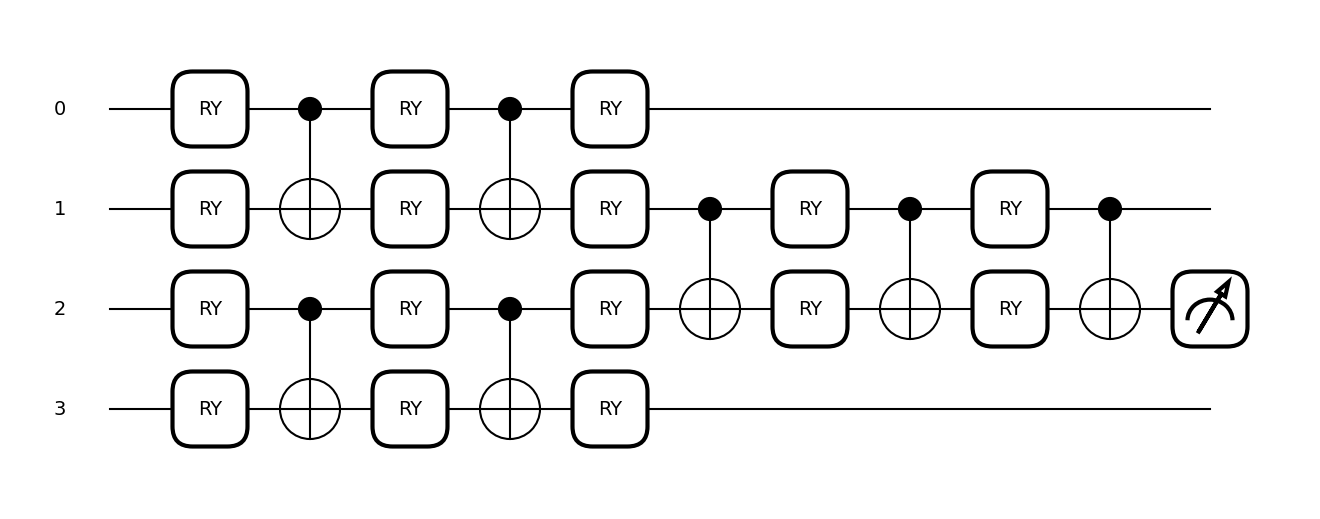

In [125]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Number of qubits
n_qubits = 4

# Define the quantum device
dev = qml.device('default.qubit', wires=n_qubits)

# Define the variational circuit
@qml.qnode(dev)
def variational_circuit(params):
    # Unpack parameters
    params_ry1, params_ry2, params_ry3, params_ry4, params_ry5 = params

    # Step 1: RY gates on all 4 qubits
    for i in range(n_qubits):
        qml.RY(params_ry1[i], wires=i)

    # Step 2: CNOT gates between qubits 0-1 and 2-3
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])

    # Step 3: RY gates on all 4 qubits
    for i in range(n_qubits):
        qml.RY(params_ry2[i], wires=i)

    # Step 4: CNOT gates between qubits 0-1 and 2-3
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])

    # Step 5: RY gates on all 4 qubits
    for i in range(n_qubits):
        qml.RY(params_ry3[i], wires=i)

    # Step 6: CNOT gate between qubits 1-2
    qml.CNOT(wires=[1, 2])

    # Step 7: RY gates on qubits 1 and 2
    qml.RY(params_ry4[0], wires=1)
    qml.RY(params_ry4[1], wires=2)

    # Step 8: CNOT gate between qubits 1-2
    qml.CNOT(wires=[1, 2])

    # Step 9: RY gates on qubits 1 and 2
    qml.RY(params_ry5[0], wires=1)
    qml.RY(params_ry5[1], wires=2)

    # Step 10: CNOT gate between qubits 1-2
    qml.CNOT(wires=[1, 2])

    # Step 11: Measurement on qubit 2.
    return qml.expval(qml.PauliZ(2))

# Initialize parameters
params_ry1 = np.random.rand(n_qubits)  # Parameters for first RY layer
params_ry2 = np.random.rand(n_qubits)  # Parameters for second RY layer
params_ry3 = np.random.rand(n_qubits)  # Parameters for third RY layer
params_ry4 = np.random.rand(2)         # Parameters for RY on qubits 1 and 2
params_ry5 = np.random.rand(2)         # Parameters for final RY on qubits 1 and 2

params = [params_ry1, params_ry2, params_ry3, params_ry4, params_ry5]

# Execute the circuit
output = variational_circuit(params)
print("Expectation Values (Qubit 2):", output)

# Visualize the circuit
fig, ax = qml.draw_mpl(variational_circuit)(params)
plt.show()

In [126]:
type(iris)

NameError: name 'iris' is not defined

In [ ]:
import numpy as np
import pennylane as qml
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # Labels


# Convert features to binary values based on the mean
mean_values = np.mean(X, axis=0)
binary_vectorized_data = (X > mean_values).astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_vectorized_data, y, test_size=0.2, random_state=42)

# Define a simple neural network classifier
def build_nn_classifier(input_dim):
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=(input_dim,)),
        layers.Dense(10, activation='relu'),
        layers.Dense(3, activation='softmax')  # 3 output classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the neural network classifier
nn_classifier = build_nn_classifier(X_train.shape[1])
nn_classifier.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Quantum function to encode and flip bits
def encode_and_flip(features, flip_index=None):
    dev = qml.device("default.qubit", wires=len(features), shots=None)
    
    @qml.qnode(dev)
    def circuit():
        for i, f in enumerate(features):
            theta = 0.0 if i == flip_index and f == 1 else f * (np.pi / 2)
            qml.RY(theta, wires=i)
        return qml.probs(wires=range(len(features)))
    
    return circuit()

# Measure and map quantum state to classical bitstring
def measure_and_map_to_classical(features, flip_index=None):
    probs = encode_and_flip(features, flip_index)
    
    measured_state = np.random.choice(len(probs), p=probs)
    bin_string = f"{measured_state:0{len(features)}b}"
    print("jnndjd ", probs)
    return np.array([int(bit) for bit in bin_string])

# Explain function using Q-LIME
def explain(vector, model, full_superposition=True):
    original_pred = model.predict(vector.reshape(1, -1))[0]
    contributions = np.zeros(len(vector))
    
    for i in range(len(vector)):
        if vector[i] == 1 or full_superposition:
            new_vec = measure_and_map_to_classical(vector, flip_index=i)
            new_pred = model.predict(new_vec.reshape(1, -1))[0]
            contributions[i] = original_pred[np.argmax(original_pred)] - new_pred[np.argmax(original_pred)]
    
    return contributions

# Example usage
sample_vector = X_test[0] 

contributions = explain(sample_vector, nn_classifier)
print("Feature contributions:", contributions)
print("Sample measured ", sample_vector) # Pick a sample


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3566 - loss: 1.1189
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3353 - loss: 1.0793 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4441 - loss: 1.0722 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4399 - loss: 1.0470 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4579 - loss: 1.0276 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7240 - loss: 1.0280 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6989 - loss: 0.9936 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7562 - loss: 0.9566 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7145 - loss: 0.9434 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7482 - loss: 0.9176 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7237 - loss: 0.9009 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data  # Feature data (sepal length, sepal width, petal length, petal width)

# Mean values for each feature
mean_values = np.mean(X, axis=0)

# Convert the features to binary values based on whether they are above or below the mean
binary_vectorized_data = (X > mean_values).astype(int)

# Print the binary vectors for each sample
#for i, binary_vector in enumerate(binary_vectorized_data):
#    print(f"Sample {i+1}: {binary_vector}")



import pennylane as qml
import numpy as np

# Quantum function that encodes the binary vector and flips features
def encode_and_flip(features, flip_index=None, shots=None):
    """
    Encode features -> quantum circuit.
    FLIP ONLY if bit == 1 at flip_index (1->0).
    """
    num_qubits = len(features)
    dev = qml.device("default.qubit", wires=num_qubits, shots=shots)
    print (features)
    @qml.qnode(dev)
    def circuit():
        for i, f in enumerate(features):
            if i == flip_index and f == 1:
                # 1->0 => RY(0)
                theta = 0.0
            else:
                # otherwise normal encoding: f * (pi/2)
                theta = f * (np.pi / 2)
            qml.RY(theta, wires=i)
        return qml.probs(wires=range(num_qubits))

    return circuit()

# Example usage with binary_vectorized_data
# Assume binary_vectorized_data is a NumPy array (e.g., shape (n_samples, n_features))

# Just for demonstration, let's consider a binary vectorized sample
features = binary_vectorized_data[3]  # Example binary vector

# Encode and flip (select feature index 2 for flipping, for example)
flip_index = 0  # We want to flip the 3rd feature
shots = 100  # Number of shots for sampling

# Run the quantum encoding and flipping
result = encode_and_flip(features, flip_index=flip_index, shots=shots)

# Output the result
print("Quantum circuit result (probabilities):", result)




[0 1 0 0]
Quantum circuit result (probabilities): [0.48 0.   0.   0.   0.52 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [134]:


import time
import random
import csv
import itertools
import json
import re
import os
import math
import pickle
from xgboost import XGBClassifier

import numpy as np
import pennylane as qml
from concurrent.futures import ThreadPoolExecutor

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score

# Classical LIME
from lime.lime_text import LimeTextExplainer

##############################################################################
# PART 0: DATA LOADING AND PREPROCESSING
##############################################################################

def clean_text(text):
    """
    Removes HTML tags and converts to lowercase.
    """
    # Remove anything between <...> tags, then lowercase the text
    cleaned = re.sub(r'<.*?>', '', text).lower()
    return cleaned

def load_imdb_subset(
    num_samples=5000, 
    min_df=1, 
    max_features=15, 
    stopwords_option=True
):
    """
    Loads a subset of IMDb data, returns:
      - X_train, X_test (lists of text)
      - y_train, y_test (0/1 sentiment)
      - vectorizer (CountVectorizer)
    
    Now with text cleaning for HTML, lowercase, etc.
    """
    data = load_files(
        "C:/Users/migue/Downloads/aclImdb_v1/aclImdb/train",
        categories=['pos','neg'], 
        encoding="utf-8", 
        decode_error="replace"                  
    )
    X_text_all, y_all = data.data, data.target

    # Clean text (HTML removal + lowercase)
    X_text_all = [clean_text(txt) for txt in X_text_all]

    # Shuffle & truncate to num_samples
    full_idx = np.arange(len(X_text_all))
    #np.random.shuffle(full_idx)
    subset_idx = full_idx[:num_samples]
    X_text = [X_text_all[i] for i in subset_idx]
    y = y_all[subset_idx]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.2, random_state=42
    )

    # Vectorizer: presence/absence
    if stopwords_option:
        vectorizer = CountVectorizer(
            binary=True, stop_words='english', 
            min_df=min_df, max_features=max_features
        )
    else:
        vectorizer = CountVectorizer(
            binary=True, stop_words=None, 
            min_df=min_df, max_features=max_features
        )

    vectorizer.fit(X_train)
    return X_train, X_test, y_train, y_test, vectorizer

def train_XGBoost_classifier(X_train, y_train, vectorizer):
    """
    Trains an XGBoost classifier on the binary presence/absence of words.
    Returns the fitted model.
    """
    X_train_bow = vectorizer.transform(X_train)
    # Use log(len(y_train)) as n_estimators (rounded to an int)
    clXGB = XGBClassifier(
        #booster="gblinear",
        objective="binary:logistic", 
        eval_metric="logloss", 
        random_state=42, 
        n_estimators=int(round(math.log(len(y_train)))),
        learning_rate=0.1, 
        max_depth=3
    )
    clXGB.fit(X_train_bow, y_train)
    return clXGB

def get_cached_xgboost(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option):
    """
    Checks if a classifier trained with the given parameters exists.
    If so, load it; otherwise, train it and save it.
    """
    filename = f"cached_xgboost_ns{num_samples}_mf{max_features}_sw{stopwords_option}_xgboost_classifier_seed42.pkl"
    if os.path.exists(filename):
        print("Loading cached xgboost from", filename)
        with open(filename, 'rb') as f:
            clXGB = pickle.load(f)
    else:
        print("No cached classifier found. Training a new one...")
        clXGB = train_XGBoost_classifier(X_train, y_train, vectorizer)
        with open(filename, 'wb') as f:
            pickle.dump(clXGB, f)
        print("Cached classifier saved as", filename)
    return clXGB



def train_logistic_classifier(X_train, y_train, vectorizer):
    """
    Trains a logistic regression on the binary presence/absence of words.
    Returns the fitted model.
    """
    X_train_bow = vectorizer.transform(X_train)
    clf = LogisticRegression()
    clf.fit(X_train_bow, y_train)
    return clf

def get_cached_logistic(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option):
    """
    Checks if a classifier trained with the given parameters exists.
    If so, load it; otherwise, train it and save it.
    """
    filename = f"cached_classifier_ns{num_samples}_mf{max_features}_sw{stopwords_option}_logistic_classifier_seed42.pkl"
    if os.path.exists(filename):
        print("Loading cached logistic from", filename)
        with open(filename, 'rb') as f:
            clf = pickle.load(f)
    else:
        print("No cached classifier found. Training a new one...")
        clf = train_logistic_classifier(X_train, y_train, vectorizer)
        with open(filename, 'wb') as f:
            pickle.dump(clf, f)
        print("Cached classifier saved as", filename)
    return clf

def train_lasso_regression(X_train, y_train, vectorizer):
    """
    Trains a logistic regression on the binary presence/absence of words.
    Returns the fitted model.
    """
    X_train_bow = vectorizer.transform(X_train)
    lasso_model = Lasso(alpha=0.5)
    lasso_model.fit(X_train_bow, y_train)
    return lasso_model
    

def get_cached_lasso(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option, alpha):
    """
    Checks if a Lasso model trained with the given parameters exists.
    If so, load it; otherwise, train it and save it.
    """
    filename = f"cached_lasso_ns{num_samples}_mf{max_features}_sw{stopwords_option}_seed42_alpha{alpha}.pkl"
    if os.path.exists(filename):
        print("Loading cached Lasso model from", filename)
        with open(filename, 'rb') as f:
            lasso_model = pickle.load(f)
    else:
        print("No cached Lasso model found. Training a new one...")
        lasso_model = train_lasso_regression(X_train, y_train, vectorizer)
        with open(filename, 'wb') as f:
            pickle.dump(lasso_model, f)
        print("Cached Lasso model saved as", filename)
    return lasso_model

##############################################################################
# CLASSICAL LIME
##############################################################################
#CHANGE clXGB TO clf IF WE WANT LOGISTIC INSTEAD OF XGBOOST
def run_classical_lime(
    text_sample, clXGB, vectorizer, 
    k_features=10, num_samples=500
):
    """
    Runs classical LIME on a single text instance.
    Returns the top (word, weight) pairs.
    """
    class_names = ["negative", "positive"]
    explainer = LimeTextExplainer(class_names=class_names, feature_selection="auto")

    def predict_proba(texts):
        bow = vectorizer.transform(texts) 
        return clXGB.predict_proba(bow)

    explanation = explainer.explain_instance(
        text_sample,
        predict_proba,
        num_features=k_features,
        num_samples=num_samples  # e.g. 300 or 500
    )
    return explanation.as_list()  # list of (word, weight)

##############################################################################
# Q-LIME Pi (Flip Only 1->0)
##############################################################################

def classical_classifier(features, weights, bias=0.0, threshold=0.01):
    # Ensure inputs are 1D arrays
    features = np.array(features).flatten()
    weights = np.array(weights).flatten()
    
    # Zero out small weights
    sparse_weights = np.where(np.abs(weights) < threshold, 0, weights)
    score = bias + np.dot(features, sparse_weights)
    return float(1 / (1 + np.exp(-score)))

def encode_and_flip(features, flip_index=None, shots=None):
    """
    Encode features -> quantum circuit.
    FLIP ONLY if bit == 1 at flip_index (1->0).
    """
    num_qubits = len(features)
    dev = qml.device("default.qubit", wires=num_qubits, shots=shots)

    @qml.qnode(dev)
    def circuit():
        for i, f in enumerate(features):
            if i == flip_index and f == 1:
                # 1->0 => RY(0)
                theta = 0.0
            else:
                # otherwise normal encoding: f * (pi/2)
                theta = f * (np.pi / 2)
            qml.RY(theta, wires=i)
        return qml.probs(wires=range(num_qubits))

    return circuit()

def sample_state(probabilities):
    """
    Sample an integer state index from the distribution.
    """
    r = random.random()
    cumsum = 0.0
    for idx, p in enumerate(probabilities):
        cumsum += p
        if r <= cumsum:
            return idx
    return len(probabilities) - 1

def measure_and_map_to_classical(features, flip_index=None, shots=None):
    """
    Run the circuit, measure, return a binary array for the top-likelihood state.
    """
    probs = encode_and_flip(features, flip_index=flip_index, shots=shots)
    measured_state = sample_state(probs)
    num_qubits = len(features)
    bin_string = f"{measured_state:0{num_qubits}b}"
    return [int(bit) for bit in bin_string]




def quantum_lime_explanation(
    features, weights, bias=0.0, shots=None
):
    """
    Flip only features that are 1 -> 0.
    Return array of shape (n_features,) with:
       Delta f_k = (original_pred - new_pred).
    """
    original_pred = classical_classifier(features, weights, bias=bias)
    contributions = np.zeros(len(features))

    def flip_and_predict(i):
        new_vec = measure_and_map_to_classical(features, flip_index=i, shots=None)
        new_pred = classical_classifier(new_vec, weights, bias=bias)
        return original_pred - new_pred

    # Flip only bits that are 1
    with ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(flip_and_predict, i): i
            for i, val in enumerate(features) if val == 1
        }
        for future in futures:
            i = futures[future]
            contributions[i] = future.result()

    return contributions

#def quantum_lime_explanation(features, clf, lasso, shots=None):
    
    # Reshape features for prediction (ensure 2D array)
    features_reshaped = np.array(features).reshape(1, -1)
    original_pred = clf.predict_proba(features_reshaped)[0, 1]
    contributions = np.zeros(len(features))

    def flip_and_predict(i):
        # Create a new feature vector with feature i flipped from 1 to 0
        new_vec = features.copy()
        new_vec[i] = 0
        new_vec_reshaped = np.array(new_vec).reshape(1, -1)
        new_pred = lasso.predict(new_vec_reshaped)[0]
        return original_pred - new_pred
 
    # Flip only bits that are 1
    with ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(flip_and_predict, i): i
            for i, val in enumerate(features) if val == 1
        }
        for future in futures:
            i = futures[future]
            contributions[i] = future.result()

    return contributions

##############################################################################
# EXPERIMENTAL ROUTINE
##############################################################################

def run_experiment( #Did I change these numbers? check if i fcked up smth here!!!!!!!!!!
    num_samples=10,
    min_df=1,
    max_features=15,
    stopwords_option=True,
    lime_num_samples=30,
    shots=None,
    n_test_explanations=5
):
    """
    1) Load data with given params (includes text cleaning)
    2) Train logistic classifier
    3) Evaluate test accuracy
    4) Pick n_test_explanations random samples
    5) For each, run classical LIME vs. Q-LIME Pi
    6) Return summary stats
    """
    # A) Load data
    X_train, X_test, y_train, y_test, vectorizer = load_imdb_subset(
        num_samples=num_samples,
        min_df=min_df,
        max_features=max_features,
        stopwords_option=stopwords_option
    )
    # B) Train model
    clf  = get_cached_logistic(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option)

    clXGB = get_cached_xgboost(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option)

    # Evaluate
    X_test_bow = vectorizer.transform(X_test)
    #test_acc = accuracy_score(y_test, clf.predict(X_test_bow))
    test_acc = accuracy_score(y_test, clf.predict(X_test_bow))

    logistic_weights = clf.coef_[0]
    bias = clf.intercept_[0]
    #IT ONLY GIVES 1 WEIGHT NOT 15
    #logistic_weights = clXGB.coef_[0]
    #bias = clXGB.intercept_[0]


    lasso_model = get_cached_lasso(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option, alpha=0.1)
    

    # We'll track times & top-feature overlap
    #lime_times = []
    #qlime_times = []
    overlaps = []

    # Random samples for explanation
    #n_test = len(X_test)
    sample_indices = [5,6,12,11,10]

    for idx in sample_indices:
        text_sample = X_test[idx]

        # 1) Classical LIME
        #start_lime = time.time()
        explanation_lime = run_classical_lime(
            text_sample, clXGB, vectorizer, 
            k_features=15, num_samples=lime_num_samples
        )


        #explanation_lime = run_classical_lime(
        #    text_sample, clf, vectorizer, 
        #    k_features=15, num_samples=lime_num_samples
        #)
        #lime_time = time.time() - start_lime
        #lime_times.append(lime_time)

        # parse top features
        lime_dict = dict(explanation_lime)
        top_words_lime = sorted(
            lime_dict.keys(),
            key=lambda w: abs(lime_dict[w]),
            reverse=True
        )[:5]

        # 2) Q-LIME Pi
        bow = vectorizer.transform([text_sample])
        bin_features = bow.toarray()[0]

        #start_qlime = time.time()
        #contributions_qlime = quantum_lime_explanation(bin_features, clf, lasso_model, shots=shots)
        contributions_qlime = quantum_lime_explanation(
            bin_features, logistic_weights, bias=bias, shots=shots)


        contributions_lime_abs = [(word, abs(score)) for word, score in explanation_lime] # Absolute values for comparison; This is a tuple. PROB SHOULD MAKE QLIME A TUPLE TOO!
        
        unsorted_contributions_qlime_abs = tuple(
            (word, abs(score)) for word, score in zip(vectorizer.get_feature_names_out(), contributions_qlime)) # Absolute values for comparison
        
        contributions_qlime_sorted = tuple(
        sorted(unsorted_contributions_qlime_abs, key=lambda x: x[1], reverse=True))

        #print("X_test_bow",X_test_bow)
          
        print("text sample", text_sample, "bin_features", bin_features)
        #, "vectorizer", vectorizer.get_feature_names_out(), "contributions_qlime_abs", contributions_qlime_abs, "Contributions_Lime", top_words_lime
     
        print("Classical LIME Explanation:")
        for word, weight in contributions_lime_abs:
            print(f"Word: {word}, Importance: {weight}")

        print("\nQ-LIME Pi Explanation:")
        for word, weight in contributions_qlime_sorted:
            print(f"Word: {word}, Importance: {weight}")

        #qlime_time = time.time() - start_qlime
        #qlime_times.append(qlime_time)

        # top 5 (by absolute value)
        nonzero_indices = [
            (i, abs(contributions_qlime[i])) 
            for i in range(len(contributions_qlime))
        ]
        top_indices_qlime = sorted(nonzero_indices, key=lambda x: x[1], reverse=True)[:5]
        top_words_qlime = [
            vectorizer.get_feature_names_out()[i2]
            for (i2, val) in top_indices_qlime
        ]

        # measure overlap
        overlap = set(top_words_lime).intersection(set(top_words_qlime))
        overlaps.append(len(overlap))

    # Summary
    results = {
        "accuracy": round(test_acc, 4),
        #"lime_time_avg": round(np.mean(lime_times), 4),
        #"qlime_time_avg": round(np.mean(qlime_times), 4),
        "overlap_avg": round(np.mean(overlaps), 4),
    }
    return results

##############################################################################
# MAIN
##############################################################################

if __name__ == "__main__":
    import pandas as pd

    # Parameter grid to systematically vary certain settings
    param_grid = {
        "num_samples": [5000],
        "max_features": [15],
        "stopwords_option": [True],
        "lime_num_samples": [300],
        # Shots: None => analytic mode, 100 => finite sampling
        "shots": [None, 100],
    }

    combos = list(itertools.product(*param_grid.values()))
    all_results = []

    for combo in combos:
        (num_samples_, max_features_, stopwords_, lime_samps_, shots_) = combo
        
        print("\n==================================")
        print(f"Running experiment with: "
              f"num_samples={num_samples_}, "
              f"max_features={max_features_}, "
              f"stopwords={stopwords_}, "
              f"lime_num_samples={lime_samps_}, "
              f"shots={shots_}")
        
        res = run_experiment(
            num_samples=num_samples_,
            max_features=max_features_,
            stopwords_option=stopwords_,
            lime_num_samples=lime_samps_,
            shots=shots_,
            n_test_explanations=5
        )
        res_row = {
            "num_samples": num_samples_,
            "max_features": max_features_,
            "stopwords": stopwords_,
            "lime_num_samples": lime_samps_,
            "shots": shots_,
            "accuracy": res["accuracy"],
            #"lime_time_avg": res["lime_time_avg"],
            #"qlime_time_avg": res["qlime_time_avg"],
            "overlap_avg": res["overlap_avg"],
        }
        print("Results =>", res_row)
        all_results.append(res_row)

    # Save results to CSV
    df = pd.DataFrame(all_results)
    df.to_csv("results_expanded_flips.csv", index=False)
    print("\nAll done! Saved results to 'results_expanded_flips.csv'.")


Running experiment with: num_samples=5000, max_features=15, stopwords=True, lime_num_samples=300, shots=None
Loading cached logistic from cached_classifier_ns5000_mf15_swTrue_logistic_classifier_seed42.pkl
Loading cached xgboost from cached_xgboost_ns5000_mf15_swTrue_xgboost_classifier_seed42.pkl
Loading cached Lasso model from cached_lasso_ns5000_mf15_swTrue_seed42_alpha0.1.pkl
text sample in iran, women are not permitted to attend men's sporting events, apparently to "protect" them from all the cursing and foul language they might hear emanating from the male fans (so since men can't restrain or behave themselves, women are forced to suffer. go figure.). "offside" tells the tale of a half dozen or so young women who, dressed like men, attempt to sneak into the high-stakes match between iran and bahrain that, in 2005, qualified iran to go to the world cup (the movie was actually filmed in large part during that game)."offside" is a slice-of-life comedy that will remind you of all tho

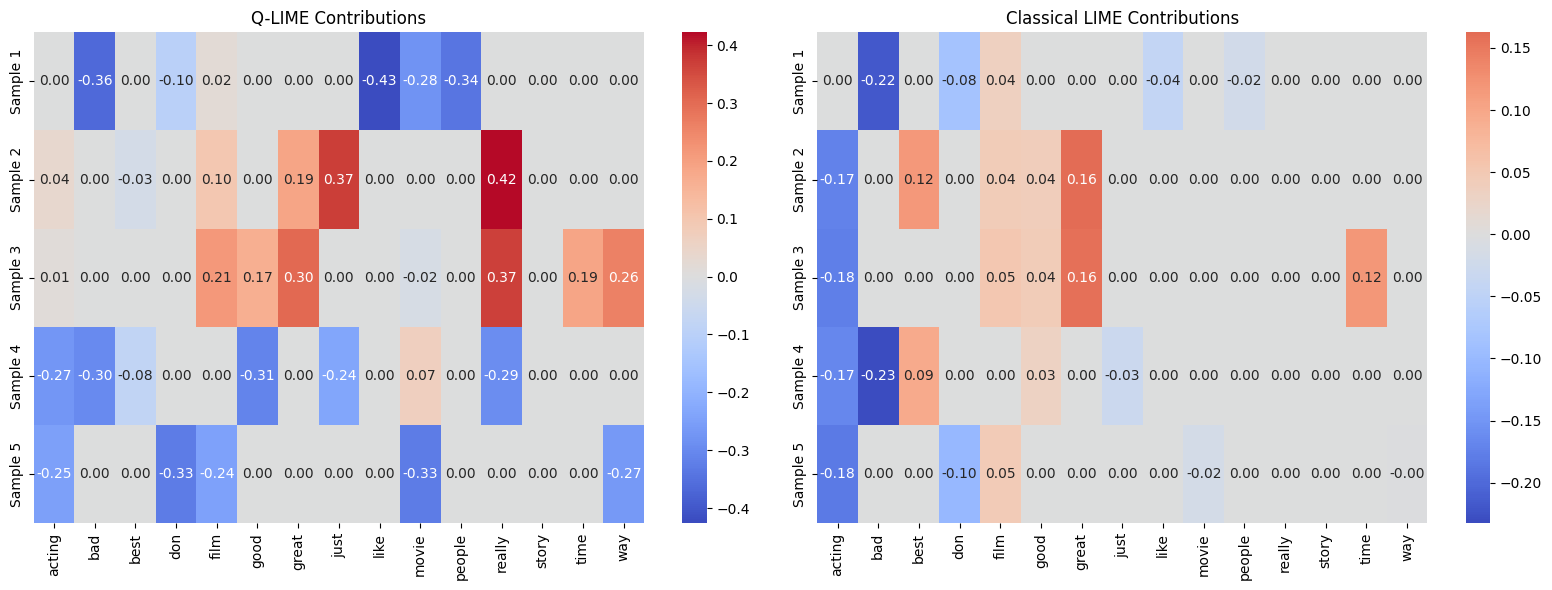

Feature Overlap Between LIME and Q-LIME: 3.8


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the feature names (vectorizer) from the experiment
vectorizer = ['acting', 'bad', 'best', 'don', 'film', 'good', 'great', 
              'just', 'like', 'movie', 'people', 'really', 'story', 'time', 'way']

# Q-LIME contributions for each sample (extracted from the provided data)
contributions_qlime = np.array([
    # Sample 1: [acting, bad, best, don, film, good, great, just, like, movie, people, really, story, time, way]
    [0.0,      -0.36452294,  0.0, -0.09921519,  0.01840303, 0.0,  0.0, 0.0, -0.42608716, -0.2789146,  -0.34304979, 0.0, 0.0, 0.0, 0.0],
    # Sample 2:
    [0.03660712, 0.0, -0.02971213,  0.0,  0.10051968, 0.00127232, 0.18862868, 0.37101693, 0.0, 0.0, 0.0, 0.42222724, 0.0, 0.0, 0.0],
    # Sample 3:
    [0.01134677, 0.0,  0.0,       0.0,  0.21448665, 0.1666414, 0.30334839, 0.0, 0.0, -0.02013076, 0.0, 0.36711733, 0.0, 0.18705312, 0.26082125],
    # Sample 4:
    [-0.27081636, -0.2986189, -0.08107251, 0.0,  0.0, -0.31106073, 0.0, -0.23548133, 0.0, 0.06957012, 0.0, -0.29178223, 0.0, 0.0, 0.0],
    # Sample 5:
    [-0.24725688, 0.0,  0.0, -0.3280996, -0.24497754, 0.0,  0.0, 0.0, 0.0, -0.3280996, 0.0, 0.0, 0.0, 0.0, -0.26653538]
])

# Classical LIME explanation only selected a few features.
# We create a full 15-length vector per sample by placing the provided importances at the appropriate indices.
# Sample 1: Selected words are: bad, don, like, film, people.
contributions_lime = np.array([
    # For vectorizer: ['acting', 'bad', 'best', 'don', 'film', 'good', 'great', 'just', 'like', 'movie', 'people', 'really', 'story', 'time', 'way']
    [0.0,       -0.21846279,  0.0, -0.08481077,  0.03502272, 0.0,  0.0, 0.0, -0.04282431, 0.0, -0.02049930, 0.0, 0.0, 0.0, 0.0],
    # Sample 2: Selected words: acting, great, best, film, good.
    [-0.17340143, 0.0, 0.11742558, 0.0, 0.04395740, 0.04120630, 0.16252398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    # Sample 3: Selected words: acting, great, time, film, good.
    [-0.17626120, 0.0, 0.0, 0.0, 0.05426050, 0.04463352, 0.15864832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11912745, 0.0],
    # Sample 4: Selected words: bad, acting, best, good, just.
    [-0.16637075, -0.23259630, 0.09494794, 0.0, 0.0, 0.03198618, 0.0, -0.02946264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    # Sample 5: Selected words: acting, don, film, movie, way.
    [-0.18179313, 0.0, 0.0, -0.10268838, 0.04635679, 0.0, 0.0, 0.0, 0.0, -0.01703457, 0.0, 0.0, 0.0, 0.0, -0.00326475]
])

# Define sample names
samples = ["Sample 1", "Sample 2", "Sample 3", "Sample 4", "Sample 5"]

# Convert the arrays into DataFrames for easier plotting with seaborn
df_qlime = pd.DataFrame(contributions_qlime, index=samples, columns=vectorizer)
df_lime  = pd.DataFrame(contributions_lime,  index=samples, columns=vectorizer)

# Plot heatmaps for Q-LIME and classical LIME contributions side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(df_qlime, cmap="coolwarm", center=0, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Q-LIME Contributions")

sns.heatmap(df_lime, cmap="coolwarm", center=0, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Classical LIME Contributions")

plt.tight_layout()
plt.show()

# Print the overlap score from the experiment
overlap_avg = 3.8
print(f"Feature Overlap Between LIME and Q-LIME: {overlap_avg}")


## Shitty ai generated QCNN

In [ ]:
import pennylane as qml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

# =============================================================================
# 1. Data Loading and Preprocessing
# =============================================================================
iris = load_iris()
features = iris.feature_names
data = np.hstack((iris.data, iris.target.reshape(-1, 1)))
iris_df = pd.DataFrame(data, columns=features + ['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.75, random_state=42
)

# Create DataFrames for training and testing
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1,1))), columns=features + ['label'])
test_df  = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1,1))),  columns=features + ['label'])

# Normalize each feature to the range [0, pi/2]
def normalize_to_half_pi(df, feature_names):
    for col in feature_names:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val) * (np.pi / 2)
    return df

train_df = normalize_to_half_pi(train_df, features)
test_df  = normalize_to_half_pi(test_df, features)

# =============================================================================
# 2. Define the Pennylane Device and Circuit
# =============================================================================
# Use a 4-qubit device
dev = qml.device("default.qubit", wires=4)

# The circuit both embeds the classical data and applies a parameterized ansatz.
# The structure below is inspired by the Qulacs version (U_conv_6) and uses 17 parameters.
@qml.qnode(dev)
def circuit(params, x):
    # -- Data Embedding --
    # For each of the 4 features, rotate the corresponding qubit by x[i].
    for i in range(4):
        qml.RY(x[i], wires=i)
    
    # -- Parameterized Circuit (QCNN Ansatz) --
    # Target Layer 1: Apply a rotation on each qubit.
    for i in range(4):
        qml.RY(params[i], wires=i)
    # Apply two CNOT gates.
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    
    # Second set of rotations on all qubits.
    for i in range(4, 8):
        qml.RY(params[i], wires=i % 4)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    
    # Third set of rotations on all qubits.
    for i in range(8, 12):
        qml.RY(params[i], wires=i % 4)
    # One CNOT gate between qubits 1 and 2.
    qml.CNOT(wires=[1, 2])
    
    # Target Layer 2: Operations only on qubits 1 and 2.
    qml.RY(params[12], wires=1)
    qml.RY(params[13], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.RY(params[14], wires=1)
    qml.RY(params[15], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.RY(params[16], wires=2)
    
    # Measure expectation of PauliZ on qubit 1.
    return qml.expval(qml.PauliZ(1))

# A helper function that obtains the circuit’s expectation value and shifts it.
def get_expectation(x, params):
    # The circuit returns a value in [-1, 1]; adding 1 scales it to [0, 2]
    return circuit(params, x) + 1

# =============================================================================
# 3. Define Classification and Cost Functions
# =============================================================================
# Classify based on the expectation value:
# If the value is >= 1.33, label 2; between 0.66 and 1.33, label 1; otherwise label 0.
def classify_tri(exp):
    if exp >= 1.33:
        return 2
    elif exp > 0.66:
        return 1
    else:
        return 0

# Cost function (mean squared error) on the training data.
def cost_train(params):
    expectations = []
    for i in range(len(train_df)):
        x = train_df.iloc[i][features].values.astype(np.float64)
        exp_val = get_expectation(x, params)
        expectations.append(exp_val)
    expectations = np.array(expectations)
    mse = np.mean((expectations - train_df['label'].values)**2)
    return mse

# =============================================================================
# 4. Optimization
# =============================================================================
# Initialize the 17 parameters randomly.
theta0 = np.random.rand(17)
result = minimize(cost_train, theta0, method='COBYLA')
optimal_params = result.x

# =============================================================================
# 5. Evaluate on Test Data
# =============================================================================
test_expectations = []
quantum_predictions = []
for i in range(len(test_df)):
    x = test_df.iloc[i][features].values.astype(np.float64)
    exp_val = get_expectation(x, optimal_params)
    test_expectations.append(exp_val)
    quantum_predictions.append(classify_tri(exp_val))

test_df['Expectation'] = test_expectations
test_df['Quantum Prediction'] = quantum_predictions

# Compute test accuracy
correct = np.sum(test_df['Quantum Prediction'] == test_df['label'])
accuracy = correct / len(test_df) * 100
print("The final classification is {:.2f}% accurate.".format(accuracy))

# =============================================================================
# (Optional) Plot the cost function convergence if cost values are recorded
# For example, if you record cost_train in each iteration, you can plot it.
# =============================================================================


    
# XGBClassifier

In [ ]:
import time
import random
import csv
import itertools
import json
import math
import re
import os
import pickle

from xgboost import XGBClassifier

import numpy as np
import pennylane as qml
from concurrent.futures import ThreadPoolExecutor

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Classical LIME
from lime.lime_text import LimeTextExplainer

##############################################################################
# PART 0: DATA LOADING AND PREPROCESSING
##############################################################################

def clean_text(text):
    """
    Removes HTML tags and converts to lowercase.
    """
    # Remove anything between <...> tags, then lowercase the text
    cleaned = re.sub(r'<.*?>', '', text).lower()
    return cleaned

def load_imdb_subset(
    num_samples=1000, 
    min_df=2, 
    max_features=20, 
    stopwords_option=True
):
    """
    Loads a subset of IMDb data, returns:
      - X_train, X_test (lists of text)
      - y_train, y_test (0/1 sentiment)
      - vectorizer (CountVectorizer)
    
    Now with text cleaning for HTML, lowercase, etc.
    """
    data = load_files(
        "C:/Users/migue/Downloads/aclImdb_v1/aclImdb/train",
        categories=['pos','neg'], 
        encoding="utf-8", 
        decode_error="replace"
    )
    X_text_all, y_all = data.data, data.target

    # Clean text (HTML removal + lowercase)
    X_text_all = [clean_text(txt) for txt in X_text_all]

    # Shuffle & truncate to num_samples
    full_idx = np.arange(len(X_text_all))
    np.random.shuffle(full_idx)
    subset_idx = full_idx[:num_samples]
    X_text = [X_text_all[i] for i in subset_idx]
    y = y_all[subset_idx]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.2, random_state=42
    )

    # Vectorizer: presence/absence
    if stopwords_option:
        vectorizer = CountVectorizer(
            binary=True, stop_words='english', 
            min_df=min_df, max_features=max_features
        )
    else:
        vectorizer = CountVectorizer(
            binary=True, stop_words=None, 
            min_df=min_df, max_features=max_features
        )

    vectorizer.fit(X_train)
    return X_train, X_test, y_train, y_test, vectorizer


def train_XGBoost_classifier(X_train, y_train, vectorizer):
    """
    Trains an XGBoost classifier on the binary presence/absence of words.
    Returns the fitted model.
    """
    X_train_bow = vectorizer.transform(X_train)
    # Use log(len(y_train)) as n_estimators (rounded to an int)
    clf = XGBClassifier(
        objective="binary:logistic", 
        eval_metric="logloss", 
        random_state=0, 
        n_estimators=int(round(math.log(len(y_train)))),
        learning_rate=0.1, 
        max_depth=3
    )
    clf.fit(X_train_bow, y_train)
    return clf

def get_cached_classifier(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option):
    """
    Checks if a classifier trained with the given parameters exists.
    If so, load it; otherwise, train it and save it.
    """
    filename = f"cached_classifier_ns{num_samples}_mf{max_features}_sw{stopwords_option}_XGBOOST.pkl"
    if os.path.exists(filename):
        print("Loading cached classifier from", filename)
        with open(filename, 'rb') as f:
            clf = pickle.load(f)
    else:
        print("No cached classifier found. Training a new one...")
        clf = train_XGBoost_classifier(X_train, y_train, vectorizer)
        with open(filename, 'wb') as f:
            pickle.dump(clf, f)
        print("Cached classifier saved as", filename)
    return clf

##############################################################################
# CLASSICAL LIME
##############################################################################

def run_classical_lime(
    text_sample, clf, vectorizer, 
    k_features=15, num_samples=500
):
    """
    Runs classical LIME on a single text instance.
    Returns the top (word, weight) pairs.
    """
    class_names = ["negative", "positive"]
    explainer = LimeTextExplainer(class_names=class_names)

    def predict_proba(texts):
        bow = vectorizer.transform(texts) 
        return clf.predict_proba(bow)

    explanation = explainer.explain_instance(
        text_sample,
        predict_proba,
        num_features=k_features,
        num_samples=num_samples  # e.g. 300 or 500
    )
    return explanation.as_list()  # list of (word, weight)

##############################################################################
# Q-LIME Pi (Flip Only 1->0)
##############################################################################

def classical_classifier(features, weights, bias=0.0):
    """
    Simple logistic: score = bias + dot(features, weights).
    Then return sigmoid.
    """
    score = bias + np.dot(features, weights)
    return 1 / (1 + np.exp(-score))

def encode_and_flip(features, flip_index=None, shots=None):
    """
    Encode features -> quantum circuit.
    FLIP ONLY if bit == 1 at flip_index (1->0).
    """
    num_qubits = len(features)
    dev = qml.device("default.qubit", wires=num_qubits, shots=shots)

    @qml.qnode(dev)
    def circuit():
        for i, f in enumerate(features):
            if i == flip_index and f == 1:
                # 1->0 => RY(0)
                theta = 0.0
            else:
                # otherwise normal encoding: f * (pi/2)
                theta = f * (np.pi / 2)
            qml.RY(theta, wires=i)
        return qml.probs(wires=range(num_qubits))

    return circuit()

def sample_state(probabilities):
    """
    Sample an integer state index from the distribution.
    """
    r = random.random()
    cumsum = 0.0
    for idx, p in enumerate(probabilities):
        cumsum += p
        if r <= cumsum:
            return idx
    return len(probabilities) - 1

def measure_and_map_to_classical(features, flip_index=None, shots=None):
    """
    Run the circuit, measure, return a binary array for the top-likelihood state.
    """
    probs = encode_and_flip(features, flip_index=flip_index, shots=shots)
    measured_state = sample_state(probs)
    num_qubits = len(features)
    bin_string = f"{measured_state:0{num_qubits}b}"
    return [int(bit) for bit in bin_string]

def quantum_lime_explanation(
    features, weights, bias=0.0, shots=None
):
    """
    Flip only features that are 1 -> 0.
    Return array of shape (n_features,) with:
       Delta f_k = (original_pred - new_pred).
    """
    original_pred = classical_classifier(features, weights, bias=bias)
    contributions = np.zeros(len(features))

    def flip_and_predict(i):
        new_vec = measure_and_map_to_classical(features, flip_index=i, shots=shots)
        new_pred = classical_classifier(new_vec, weights, bias=bias)
        return original_pred - new_pred

    # Flip only bits that are 1
    with ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(flip_and_predict, i): i
            for i, val in enumerate(features) if val == 1
        }
        for future in futures:
            i = futures[future]
            contributions[i] = future.result()

    return contributions

##############################################################################
# EXPERIMENTAL ROUTINE
##############################################################################

def run_experiment( 
    num_samples=10,
    min_df=1,
    max_features=15,
    stopwords_option=True,
    lime_num_samples=30,
    shots=None,
    n_test_explanations=5
):
    """
    1) Load data with given params (includes text cleaning)
    2) Train classifier (with caching to avoid retraining if parameters are the same)
    3) Evaluate test accuracy
    4) Pick n_test_explanations random samples
    5) For each, run classical LIME vs. Q-LIME Pi
    6) Return summary stats
    """
    # A) Load data
    X_train, X_test, y_train, y_test, vectorizer = load_imdb_subset(
        num_samples=num_samples,
        min_df=min_df,
        max_features=max_features,
        stopwords_option=stopwords_option
        random_state=42
    )
    # B) Train (or load cached) classifier
    clf = get_cached_classifier(X_train, y_train, vectorizer, num_samples, max_features, stopwords_option)

    # Evaluate
    X_test_bow = vectorizer.transform(X_test)
    test_acc = accuracy_score(y_test, clf.predict(X_test_bow))

    # Use feature importance instead of coefficients.
    # Note: XGBoost does not have an intercept term.
    logistic_weights = clf.feature_importances_
    bias = 0.0  

    # We'll track times & top-feature overlap
    lime_times = []
    qlime_times = []
    overlaps = []

    # Random samples for explanation
    n_test = len(X_test)
    sample_indices = np.random.choice(n_test, size=n_test_explanations, replace=False)

    for idx in sample_indices:
        text_sample = X_test[idx]

        # 1) Classical LIME
        start_lime = time.time()
        explanation_lime = run_classical_lime(
            text_sample, clf, vectorizer, 
            k_features=10, num_samples=lime_num_samples
        )
        lime_time = time.time() - start_lime
        lime_times.append(lime_time)

        # Parse top features from LIME explanation
        lime_dict = dict(explanation_lime)
        top_words_lime = sorted(
            lime_dict.keys(),
            key=lambda w: abs(lime_dict[w]),
            reverse=True
        )[:10]

        # 2) Q-LIME Pi
        bow = vectorizer.transform([text_sample])
        bin_features = bow.toarray()[0]

        start_qlime = time.time()
        contributions_qlime = quantum_lime_explanation(
            bin_features, logistic_weights, bias=bias, shots=shots
        )
        print("text sample", text_sample, "bin_features", bin_features, "vectorizer", vectorizer.get_feature_names_out(), "contributions_qlime", contributions_qlime, "Contributions_Lime", top_words_lime)
        print("Classical LIME Explanation:")
        for word, weight in explanation_lime:
            print(f"Word: {word}, Importance: {weight}")

        qlime_time = time.time() - start_qlime
        qlime_times.append(qlime_time)

        # Top 5 (by absolute value) for Q-LIME
        nonzero_indices = [
            (i, abs(contributions_qlime[i])) 
            for i in range(len(contributions_qlime))
        ]
        top_indices_qlime = sorted(nonzero_indices, key=lambda x: x[1], reverse=True)[:5]
        top_words_qlime = [
            vectorizer.get_feature_names_out()[i2]
            for (i2, val) in top_indices_qlime
        ]

        # Measure overlap between LIME and Q-LIME top words
        overlap = set(top_words_lime).intersection(set(top_words_qlime))
        overlaps.append(len(overlap))

    # Summary of experiment
    results = {
        "accuracy": round(test_acc, 4),
        "lime_time_avg": round(np.mean(lime_times), 4),
        "qlime_time_avg": round(np.mean(qlime_times), 4),
        "overlap_avg": round(np.mean(overlaps), 4),
    }
    return results

##############################################################################
# MAIN
##############################################################################

if __name__ == "__main__":
    import pandas as pd

    # Parameter grid to systematically vary certain settings
    param_grid = {
        "num_samples": [5000],
        "max_features": [15],
        "stopwords_option": [True], # False is also possible!
        "lime_num_samples": [300],
        # Shots: None => analytic mode, 2 => finite sampling
        "shots": [None, 2],
    }

    combos = list(itertools.product(*param_grid.values()))
    all_results = []

    for combo in combos:
        (num_samples_, max_features_, stopwords_, lime_samps_, shots_) = combo
        
        print("\n==================================")
        print(f"Running experiment with: "
              f"num_samples={num_samples_}, "
              f"max_features={max_features_}, "
              f"stopwords={stopwords_}, "
              f"lime_num_samples={lime_samps_}, "
              f"shots={shots_}")
        
        res = run_experiment(
            num_samples=num_samples_,
            max_features=max_features_,
            stopwords_option=stopwords_,
            lime_num_samples=lime_samps_,
            shots=shots_,
            n_test_explanations=5
        )
        res_row = {
            "num_samples": num_samples_,
            "max_features": max_features_,
            "stopwords": stopwords_,
            "lime_num_samples": lime_samps_,
            "shots": shots_,
            "accuracy": res["accuracy"],
            "lime_time_avg": res["lime_time_avg"],
            "qlime_time_avg": res["qlime_time_avg"],
            "overlap_avg": res["overlap_avg"],
        }
        print("Results =>", res_row)
        all_results.append(res_row)

    # Save results to CSV
    df = pd.DataFrame(all_results)
    df.to_csv("results_expanded_flips.csv", index=False)
    print("\nAll done! Saved results to 'results_expanded_flips.csv'.")



Running experiment with: num_samples=5000, max_features=15, stopwords=True, lime_num_samples=300, shots=None


TypeError: load_imdb_subset() got an unexpected keyword argument 'random_state'